# MNIST 손글씨 이미지 분류하기

## 출처: [8. MNIST 손글씨 이미지 분류하기](https://codetorial.net/tensorflow/mnist_classification.html)

In [1]:
# 버전 확인하기
import platform
print('python version: ' + platform.python_version()) # 파이썬 버전
!jupyter lab --version # 주피터랩 버전

python version: 3.7.13
3.3.2


In [2]:
import tensorflow as tf

In [3]:
# MNIST 손글씨 이미지 데이터셋 불러와서 사용
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() # 4개의 Numpy Array 반환
print('train data: ', (X_train.shape, y_train.shape))
print('test data: ', (X_test.shape, y_test.shape)) 

train data:  ((60000, 28, 28), (60000,))
test data:  ((10000, 28, 28), (10000,))


In [4]:
# 데이터 전처리
# 0 ~ 255 사이의 값을 갖는 픽셀값들 --> 0 ~ 1 사이의 값을 갖도록 반환
X_train, X_test = X_train/255, X_test/255

In [5]:
# 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model

In [6]:
# tf.keras.models.Sequential()을 이용해서 인공신경망 모델 구성
# 입력층에서 Flatten()을 이용해 28x28 픽셀의 값을 784개의 1차원 배열로 변환
# 2개의 뉴런층: Dense()를 이용해서 완전 연결된 층을 구성
# 각 층은 512개와 10개의 인공 뉴런 노드를 갖고 활성화 함수(Relu와 softmax) 사용

In [7]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# 모델 훈련
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1998 - accuracy: 0.9409
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0803 - accuracy: 0.9754
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0362 - accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0268 - accuracy: 0.9909


In [9]:
# 정확도 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('정확도는.. ' + str(round(test_acc, 2)))

313/313 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9772: 0s - loss: 0.0807 - accuracy: 
정확도는.. 0.98


In [10]:
# optimizer: Adam(Adaptive Momentum estimation)
# 정확도: 테스트 이미지 중 올바르게 분류할 비율을 의미
# model.fit(학습 데이터, 레이블, 에포크)
# epoch(에포크): 전체 학습 데이터를 몇 번 반복해서 학습할지에 대한 횟수
# model.evaluate(): 10000개의 테스트 샘플에 대해 손실과 정확도를 평가
# 정확도는 94.27%가 나오는 것을 알 수 있다

In [11]:
# epochs에 따른 acc와 loss 확인하기
loss, accuracy = [], []
for i in range(10):
    model.fit(X_train, y_train, epochs=1)
    loss.append(model.evaluate(X_test, y_test)[0])
    accuracy.append(model.evaluate(X_test, y_test)[1])
    
print('acc: ', accuracy)
print('loss: ', loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1130 - accuracy: 0.9797
acc:  [0.9776999950408936, 0.9790999889373779, 0.9793000221252441, 0.9832000136375427, 0.9832000136375427, 0.9776999950408936, 0.9810000061988831, 0.9811999797821045, 0.9836000204086304, 0.9797000288963318]
loss:  [0.08336318284273148, 0.07641265541315079, 0.08956431597471237, 0.07487107068300247, 0.07734837383031845, 0.10599058866500854, 0.09792781621217728, 0.09499701857566833, 0.08068984746932983, 0.11296160519123077]


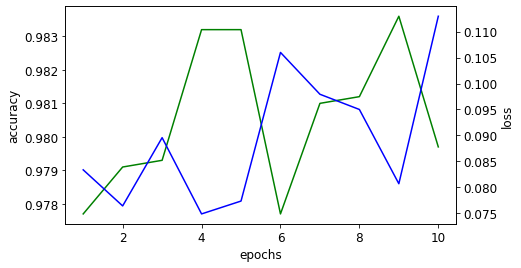

In [12]:
# acc와 loss 시각화
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['font.size'] = 12

X_values = list(range(1, 11))

fig, ax1 = plt.subplots()
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy')
ax1.plot(X_values, accuracy, color='green')

ax2 = ax1.twinx()
ax2.set_ylabel('loss')
ax2.plot(X_values, loss, color='blue')

plt.show()